In [1]:
import numpy as np
import cv2
#import os
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
import random
#import math

In [2]:
# calculate frechet inception distance
def calculate_fid(act1, act2):
    # calculate mean and covariance statistics
    mu1 = act1.mean(axis=0)
    sigma1 = np.cov(act1, rowvar=False)
    mu2 = act2.mean(axis=0)
    sigma2 = np.cov(act2, rowvar=False)
    
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    
    # check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    
    # calculate score
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

(123, 128)


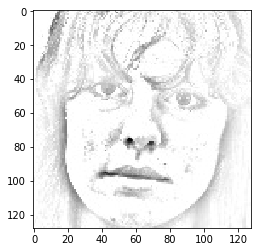

In [3]:
image = np.float64(cv2.imread('../Image pre-processing/voice_to_face_data/2d_photos/ADAPT128/140012.jpg',-1))
image2 = np.float64(cv2.imread('../Image pre-processing/voice_to_face_data/2d_photos/ADAPT128/140017.jpg',-1))
image3 = np.float64(cv2.imread('../Image pre-processing/voice_to_face_data/2d_photos/ADAPT128/140018.jpg',-1))
image4 = np.float64(cv2.imread('../Image pre-processing/voice_to_face_data/2d_photos/ADAPT128/140022.jpg',-1))
image5 = np.float64(cv2.imread('../Image pre-processing/voice_to_face_data/2d_photos/ADAPT128/140023.jpg',-1))
image6 = np.float64(cv2.imread('../Image pre-processing/voice_to_face_data/2d_photos/ADAPT128/140025.jpg',-1))
image7 = np.float64(cv2.imread('../Image pre-processing/voice_to_face_data/2d_photos/ADAPT128/140027.jpg',-1))
image8 = np.float64(cv2.imread('../Image pre-processing/voice_to_face_data/2d_photos/ADAPT128/140028.jpg',-1))
D = np.zeros((8,128,128))
D[0] = image
D[1] = image2
D[2] = image3
D[3] = image4
D[4] = image5
D[5] = image6
D[6] = image7
D[7] = image8
img = np.ones((128,128))*255
img[5:,:] = image[:123,:]
img2 = np.ones((128,128))*255
img2[5:,:] = image2[:123,:]
print(img[5:,:].shape)
plt.imshow(image4,cmap='gray')

In [4]:
calculate_fid(img,image3)


24918.19075209761

In [13]:
def lineup(generated, real_id, numFaces=3, dictionary=D):
    
    dict_size = dictionary.shape[0] #total number of face_ids
    # Set up array of face_ids for the lineup
    line_up = np.zeros(numFaces,dtype='int')
    line_up[0] = real_id # the passed face will be first in line for simplicity
    
    # Generate a randomly ordered list of all possible face_ids
    numbers = list(range(dict_size))
    random.shuffle(numbers)
    # Fill the lineup with random faces
    for i in range(line_up.shape[0]-1):
        temp = numbers.pop()
        # Checking to make sure that the passed face is not represented twice
        if (temp == real_id):
            temp = numbers.pop()
        line_up[i+1] = temp
        
    # Load the full faces for comparison using FID 
    faces = np.zeros((dictionary.shape[1],dictionary.shape[2],numFaces))
    for i in range(line_up.shape[0]):
        faces[:,:,i] = dictionary[line_up[i]]

    # Calculate the FID between each real face and the generated face
    errors = np.zeros(numFaces)
    for i in range(numFaces):
        errors[i] = calculate_fid(generated, faces[:,:,i])
    
    # minimum FID means the generated face is closest to real face
    order = np.argsort(errors)
    #change from 0-indexing to 1-indexing
    result = order[0]+1
    return result

In [20]:
lineup(img, 0, 7)

[0 3 4 2 7 5 6]


1